In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Análise de Componentes Principais (ACP)

#### Análise descritiva dos dados

Dados de doze empresas e 3 variáveis - exemplo de MINGOTI (2005). Vamos criar o *dataframe* usando a função *DataFrame* do *pandas*. Poderíamos também ter os dados salvos em uma planilha e usar a função *read_csv* para lê-la.

In [3]:
# ganho bruto - B (X1)
# ganho líquido - L (X2)
# patrimônio acumulado - P (X3)
emp = pd.DataFrame({'B': [9893,8776,13572,6455,5129,5432,3807,3423,3708,3294,5433,6287],
                  'L': [564,389,1103,743,203,215,385,187,127,297,432,451],
                  'P': [17689,17359,18597,8745,14397,3467,4679,6754,2275,6754,5589,8972]})
emp

,B,L,P
0,9893,564,17689
1,8776,389,17359
2,13572,1103,18597
3,6455,743,8745
4,5129,203,14397
5,5432,215,3467
6,3807,385,4679
7,3423,187,6754
8,3708,127,2275
9,3294,297,6754


In [4]:
# resumo do conjunto de dados
emp.describe()

,B,L,P
count,12.000000,12.000000,12.000000
mean,6267.416667,424.666667,9606.416667
std,3090.405900,276.169360,5865.842906
min,3294.000000,127.000000,2275.000000
25%,3782.250000,212.000000,5361.500000
50%,5432.500000,387.000000,7749.500000
75%,7035.250000,479.250000,15137.500000
max,13572.000000,1103.000000,18597.000000


In [5]:
# obter n
n = emp.shape[0]
n

12

In [6]:
# obter p
p = emp.shape[1]
p

3

In [7]:
# vetor de médias
emp.mean()

B    6267.416667
L     424.666667
P    9606.416667
dtype: float64

In [8]:
# matriz de covariâncias
S = emp.cov()
S

,B,L,P
B,9.550609e+06,706121.060606,1.497823e+07
L,7.061211e+05,76269.515152,9.339151e+05
P,1.497823e+07,933915.060606,3.440811e+07


In [9]:
# matriz de correlações
R = emp.corr()
R

,B,L,P
B,1.000000,0.827348,0.826256
L,0.827348,1.000000,0.576503
P,0.826256,0.576503,1.000000


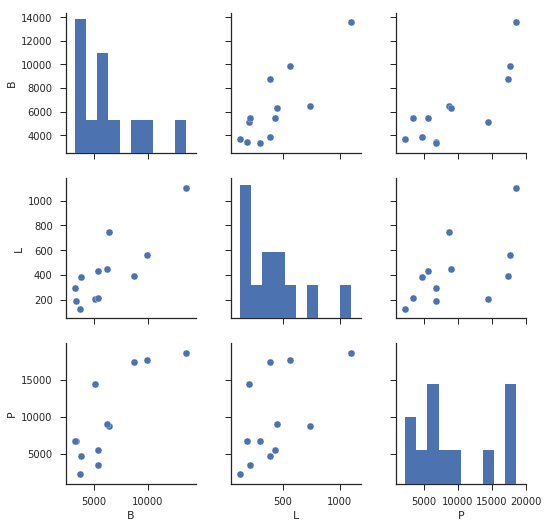

In [10]:
sns.set(style='ticks')
sns.pairplot(emp);

## Aula 1 - ACP usando $\boldsymbol{S}$ e $\boldsymbol{R}$


#### 1 Usando a matriz de covariâncias $\boldsymbol{S}$ (não é a melhor opção)

### Decomposição espectral: autovalores e autovetores

In [11]:
# autovalores e autovetores de S
l, e = np.linalg.eig(S)
print(l)
print(e)

[  4.14743915e+07   2.53950713e+06   2.10925256e+04]
[[ 0.42509725  0.8997068   0.09909593]
 [ 0.02766083  0.09651661 -0.99494694]
 [ 0.90472493 -0.42569029 -0.01614231]]


#### Garantir que autovalores ordenados em ordem descrescente

In [12]:
l, e = np.linalg.eig(S)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[  4.14743915e+07   2.53950713e+06   2.10925256e+04]
[[ 0.42509725  0.8997068   0.09909593]
 [ 0.02766083  0.09651661 -0.99494694]
 [ 0.90472493 -0.42569029 -0.01614231]]


Verificar que a soma das variâncias de $\boldsymbol(Y)$ é igual à soma das variâncias de $\boldsymbol(X)$, ou seja, $\sum \lambda_i$ = $\sum \sigma_{ii}$.

In [13]:
# soma das variâncias de X é o traço da matriz S
np.trace(S)

44034991.13636364

In [14]:
# soma das variâncias de Y é a soma dos autovalores
np.sum(l)

44034991.13636364

In [15]:
# mas a soma das variâncias de Y também é o traço da matriz Lambda
L = np.diag(l)
print(L)
np.trace(L)

[[  4.14743915e+07   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.53950713e+06   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.10925256e+04]]


44034991.13636364

In [16]:
# autovalores e autovetores de R
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[ 2.49253211  0.42349813  0.08396976]
[[ 0.61670267 -0.00126721  0.78719515]
 [ 0.55679445 -0.70619694 -0.43733949]
 [ 0.556469    0.70801432 -0.43480796]]


### Análise de Componentes Principais

Usando scikit-learn

**Atenção:** primeiro faremos a análise de componentes principais usando a matriz de covariâncias, mas essa não é a melhor opção na maior parte das situações. Isso ocorre porque algumas variáveis tendem a ter variâncias muito maiores do que outras e acabam dominando a análise.

In [17]:
X = emp

In [18]:
pca = PCA() 
resultado_pca = pca.fit_transform(X)  # se a matriz de correlações R for usada, colocar scale(X) em vez de X
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

In [19]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.42509725,  0.02766083,  0.90472493],
       [-0.8997068 , -0.09651661,  0.42569029],
       [-0.09909593,  0.99494694,  0.01614231]])

In [20]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([  4.14743915e+07,   2.53950713e+06,   2.10925256e+04])

In [21]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  94.19,   99.96,  100.01])

In [22]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
0,8857.594255,165.267260
1,8079.360752,1046.652367
2,11257.926468,-2810.249726
3,-690.798614,-566.191163
4,3844.090910,3084.940522
5,-5915.416219,-1841.623669
6,-5504.970291,119.928682
7,-3796.380242,1367.833726
8,-7729.150154,-789.458508
9,-3848.175097,1473.279076


In [29]:
# mostrar escores do primeiro CP 
escores_pc1 = pd.DataFrame(data=resultado_pca[:, 0], columns=['CP1'])

In [30]:
escores_pc1

,CP1
0,8857.594255
1,8079.360752
2,11257.926468
3,-690.798614
4,3844.090910
5,-5915.416219
6,-5504.970291
7,-3796.380242
8,-7729.150154
9,-3848.175097


In [31]:
# só mostrando os menores ou maiores escores do CP1 (ascending=True é para ordem crescente)
(escores_pc1
 .sort_values(by='CP1', ascending=True)
 .loc[:,['CP1']]
 .iloc[:20,:])

,CP1
8,-7729.150154
5,-5915.416219
6,-5504.970291
10,-3989.162413
9,-3848.175097
7,-3796.380242
3,-690.798614
11,-564.919354
4,3844.090910
1,8079.360752


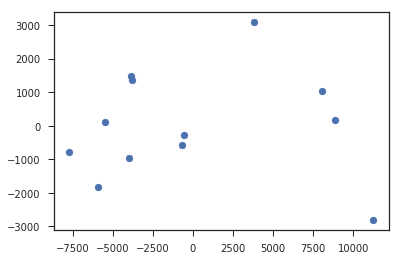

In [33]:
# diagrama de dispersão dos 2 primeiros CPs usando matplotlib
plt.scatter(resultado_pca[:, 0], resultado_pca[:, 1]);

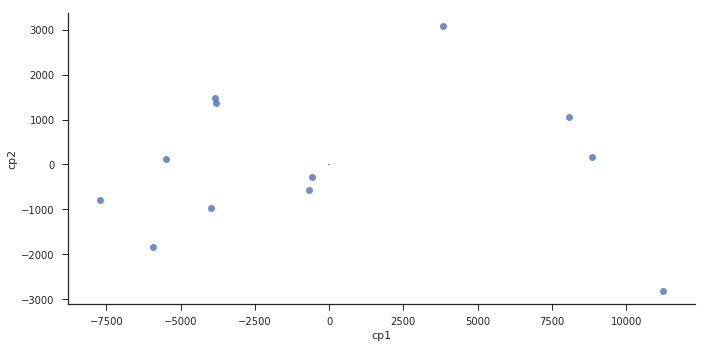

In [34]:
# diagrama de dispersão dos 2 primeiros CPs usando seaborn
sns.lmplot('cp1', 'cp2', fit_reg=False, data=resultado, aspect=2)
plt.hlines(0, -4, 4, color='gray')
plt.vlines(0, -4, 4, color='gray');

In [35]:
# para tirar as linhas em volta do gráfico
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)
# para que as linhas em volta do gráfico voltem a aparecer
# plt.rc('axes.spines', top=True, right=True, left=True, bottom=True)

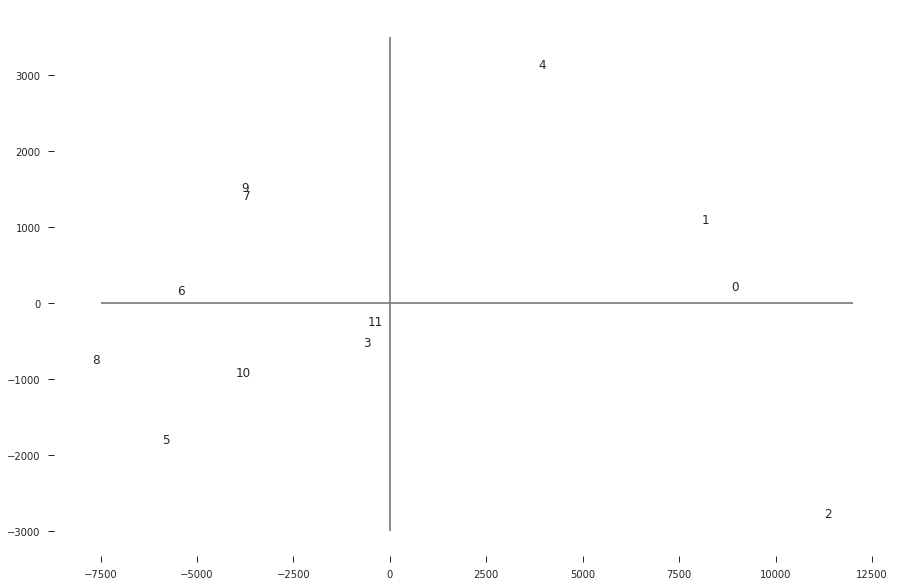

In [36]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -7500, 12000, color='gray')
plt.vlines(0, -3000, 3500, color='gray');

## Aula 2 - ACP usando $\boldsymbol{S}$ e $\boldsymbol{R}$, *scree plot*, gráfico de correlações, número de CPs

#### 2 ACP usando a matriz de correlações (melhor opção)

In [87]:
X = emp

In [88]:
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [89]:
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

In [90]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.61670267,  0.55679445,  0.556469  ],
       [-0.00126721, -0.70619694,  0.70801432],
       [ 0.78719515, -0.43733949, -0.43480796]])

Interpretação:

- Y1: índice de desempenho global da empresa (valores altos positivos indicam empresas que tiveram ganhos B, L e P maiores do que a média)
- Y2: comparação entre L e P (valores ~ 0 indicam empresas em que L está em equilíbrio com P)
- Y3: comparação de B com o índice composto por por L e P (representa pouco da variação total, mas pode ser de interesse para o pesquisador)

In [91]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.71912594,  0.46199796,  0.09160337])

In [92]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  83.08,   97.2 ,  100.  ])

In [93]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
0,1.849933,0.645271
1,1.215910,1.071540
2,3.841723,-0.681407
3,0.624086,-0.958889
4,-0.229387,1.196460
5,-1.223956,-0.213646
6,-1.084577,-0.514195
7,-1.375958,0.276384
8,-1.886702,-0.128149
9,-1.171209,-0.017351


In [94]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  83.08,   97.2 ,  100.  ])

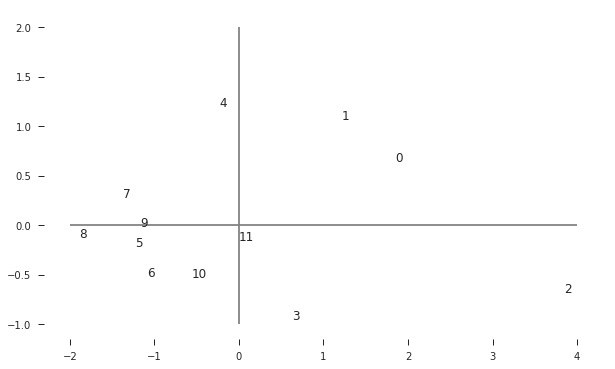

In [95]:
# diagrama de dispersão dos escores dos dois primeiros CPs
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -2, 4, color='gray')
plt.vlines(0, -1, 2, color='gray');

Gráficos: tipo de *scree plot* e diagrama de dispersão com vetores indicando correlações entre variáveis e CPs.

https://www.kaggle.com/nanomathias/predicting-r-vs-python

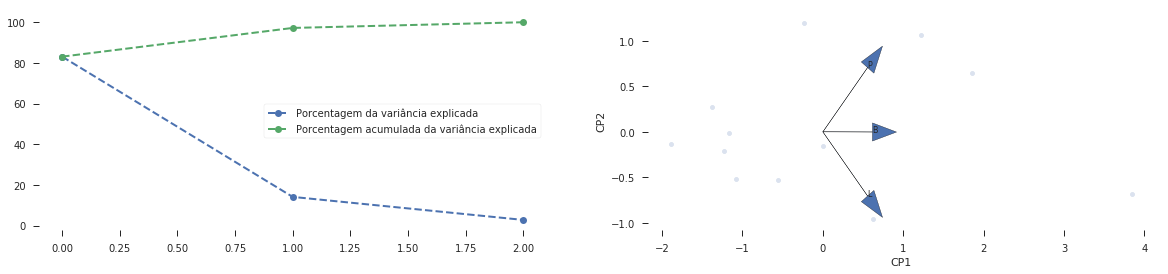

In [98]:
def get_angle(v1, v2):
    # calcula ângulo entre dois vetores
    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

def annotate_embedding(loadings, pc_x, pc_y, ax, scaling=10, n_features=10, angle_thr=20):
    # função para adicionar loadings no gráfico
    loadings['VectorLength'] = np.sqrt(loadings[pc_x]**2 + loadings[pc_y]**2)
    loadings = loadings.sort_values(by='VectorLength', ascending=False)
    
    # plota cada um dos maiores vetores 
    for feature, row in loadings.iloc[0:n_features].iterrows():
        vector = np.array([row[pc_x]*scaling, row[pc_y]*scaling])
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
        ax.annotate(feature, xy=(0, 0), xytext=(vector[0], vector[1]), fontsize=8)
    
    # retorna lista ordenada
    top_features = loadings.index.tolist()
    return top_features

# cria um dataframe com os resultados da ACP
pca_df = pd.DataFrame(
    resultado_pca,
    index=X.index,
    columns=['CP' + str(i + 1) for i in range(resultado_pca.shape[1])]
)

import itertools
# cria dois gráficos
_, axes = plt.subplots(ncols=2, figsize=(20, 4))  # número de colunas e tamanho

# plota a variância explicada
axes[0].plot(
    pca.explained_variance_ratio_*100, "--o", linewidth=2,
    label='Porcentagem da variância explicada'
)

# plota a variância explicada acumulada
axes[0].plot(
    (pca.explained_variance_ratio_ * 100).cumsum(), "--o", linewidth=2,
    label='Porcentagem acumulada da variância explicada'
)

# mostra legenda
axes[0].legend(loc='best', frameon=True)
    
# loadings de cada componente
loadings = pd.DataFrame(
    pca.components_,
    index=['CP'+str(i+1) for i in range(len(pca.components_))],
    columns=X.columns
).T

# plota os componentes
i = 1
x, y = 'CP'+str(i), 'CP'+str(i+1)
# plotar
settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 0.2, 'x': x, 'y': y}
pca_df.plot(label=None, **settings)
# mostrar os loadings
annotate_embedding(loadings, x, y, axes[i], scaling=1, n_features=20, angle_thr=20)
    
# faz aparecer o gráfico
plt.show();

## Selecionar componentes principais

O objetivo principal da ACP é reduzir a dimensionalidade dos dados, fazendo uma projeção em um subespaço menor, onde os autovetores formarão os eixos. No entanto, os autovetores definem apenas as direções do novo eixo, uma vez que possuem o mesmo comprimento de unidade 1, o que pode ser confirmado pelas duas linhas de código a seguir:

In [48]:
for ei in pca.components_:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ei))
print('ok!')

ok!


Para decidir quantos CPs podem ser descartados sem perder muita informação para a construção do subespaço, precisamos inspecionar os autovalores correspondentes: os menores autovalores possuem a menor informação sobre a distribuição dos dados e são os que podem ser descartados. Para fazer isso, a abordagem comum é classificar os autovalores de maior para menor, a fim de escolher os $k$ CPs.

In [49]:
# lista com autovalores e autovetores
eig_pairs = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.explained_variance_))]

# ordenar em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

# visualizar autovalores
print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

Autovalores em ordem decrescente:
2.71912594333
0.46199795857
0.0916033708312


Depois de classificar os pares, a próxima pergunta é 'quantos CPs vamos escolher?'. Uma medida útil é a 'variância explicada', calculada a partir dos autovalores. A variância explicada nos diz quanta informação (variância) pode ser atribuída a cada um dos componentes principais.

In [50]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  83.08440382,   97.20100811,  100.        ])

In [51]:
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
cp

['CP1', 'CP2', 'CP3']

In [52]:
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
df

,cp,var_exp,cum_var_exp
0,CP1,83.084404,83.084404
1,CP2,14.116604,97.201008
2,CP3,2.798992,100.000000


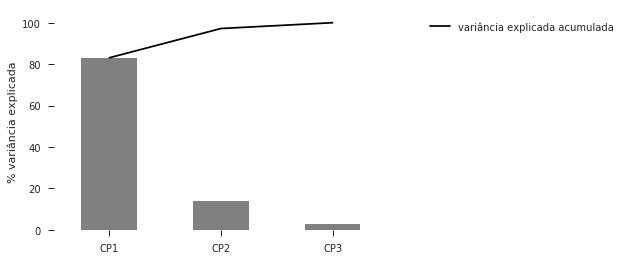

In [54]:
# scree plot
fig, ax = plt.subplots()
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='upper right', 
           bbox_to_anchor=(1.7, 1))
plt.ylabel('% variância explicada')
plt.xlabel('');

Os dois primeiros CPs explicam 97% da variação total. Ficaremos com os dois então. Mas poderíamos ficar apenas com o primeiro.

### Dados de poluição do ar

- $SO2$: SO2 content of air in micrograms per cubic metre;
- $temp$: average annual temperature in degrees Fahrenheit;
- $manu$: number of manufacturing enterprises employing 20 or more workers;
- $popul$: population size (1970 census) in thousands;
- $wind$: average annual wind speed in miles per hour;
- $precip$: average annual precipitation in inches;
- $predays$: average number of days with precipitation per year.

In [99]:
air = pd.read_csv('air.csv', index_col='city')

In [100]:
air.head(10)

,SO2,temp,manu,popul,wind,precip,predays
city,,,,,,,
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148
Chicago,110,50.6,3344,3369,10.4,34.44,122
Cincinnati,23,54.0,462,453,7.1,39.04,132
Cleveland,65,49.7,1007,751,10.9,34.99,155


In [101]:
# n e p
air.shape

(41, 7)

In [102]:
# selecionando as 6 últimas variáveis
X = air.iloc[:,1:7]

In [103]:
X.head()

,temp,manu,popul,wind,precip,predays
city,,,,,,
Albany,47.6,44,116,8.8,33.36,135
Albuquerque,56.8,46,244,8.9,7.77,58
Atlanta,61.5,368,497,9.1,48.34,115
Baltimore,55.0,625,905,9.6,41.31,111
Buffalo,47.1,391,463,12.4,36.11,166


In [104]:
# ACP
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [105]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [106]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
print(pca.components_)

[[-0.32964613  0.61154243  0.57782195  0.35383877 -0.04080701  0.23791593]
 [ 0.1275974   0.16805772  0.22245325 -0.13079154 -0.62285781 -0.70776534]
 [ 0.67168611  0.27288633  0.35037413 -0.29725334  0.50456294 -0.09308852]
 [ 0.30645728 -0.13684076 -0.07248126  0.86942583  0.17114826 -0.31130693]
 [ 0.55805638 -0.10204211  0.07806551  0.11326688 -0.56818342  0.58000387]
 [ 0.1361878   0.70297051 -0.69464131  0.02452501 -0.06062222  0.02196062]]


In [107]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.25106671,  1.53744202,  1.42951535,  0.77923256,  0.11743492,
        0.03530845])

In [108]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 36.6 ,  61.6 ,  84.84,  97.51,  99.42,  99.99])

In [109]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[-0.32964613  0.61154243  0.57782195  0.35383877 -0.04080701  0.23791593]
 [ 0.1275974   0.16805772  0.22245325 -0.13079154 -0.62285781 -0.70776534]
 [ 0.67168611  0.27288633  0.35037413 -0.29725334  0.50456294 -0.09308852]]


In [110]:
X.columns

Index(['temp', 'manu', 'popul', 'wind', 'precip', 'predays'], dtype='object')

Interpretação:

- Y1: índice global de qualidade de vida - escores altos indicam cidades maiores, com mais fábricas, mais gente, mais vento, mais dias chuvosos, temp. baixas
- Y2: índice de chuvas - escores altos negativos indicam cidades chuvosas
- Y3: leva em conta chuvas e temperatura - altos valores para cidades quentes e úmidas e baixos para frias e secas

In [111]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
city,,
Albany,-0.538946,-0.792069
Albuquerque,-1.417093,2.865890
Atlanta,-0.598995,-0.587236
Baltimore,0.509380,-0.028754
Buffalo,1.390709,-1.880301
Charleston,-1.429753,-1.210584
Chicago,6.513882,1.668382
Cincinnati,-0.508221,-0.486010
Cleveland,1.766279,-1.039427


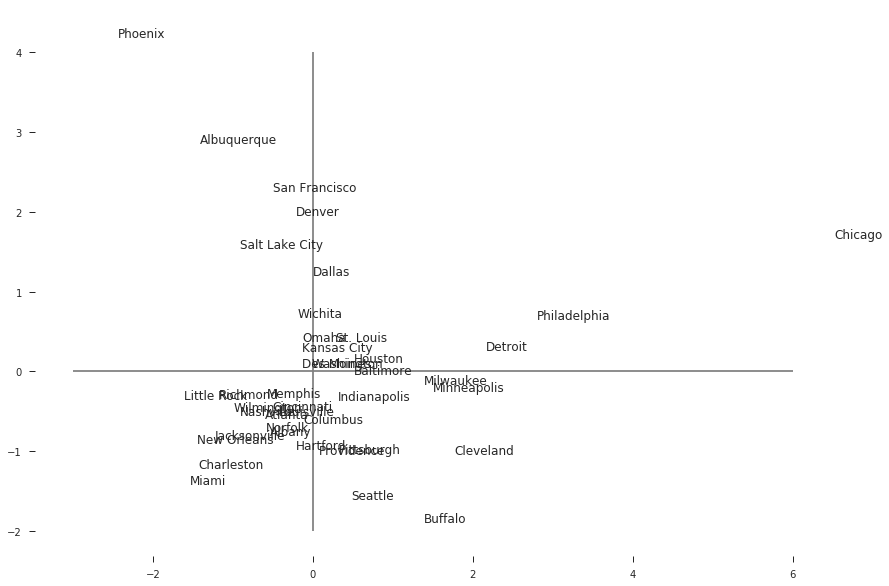

In [112]:
# diagrama de dispersão com os nomes das cidades
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -3, 6, color='gray')
plt.vlines(0, -2, 4, color='gray');

Interpretação:

- Y1: índice global de qualidade de vida - escores altos indicam cidades maiores, com mais fábricas, mais gente, mais vento, mais dias chuvosos, temp. baixas
- Y2: índice de chuvas - escores altos negativos indicam cidades chuvosas
- Y3: leva em conta chuvas e temperatura - altos valores para cidades quentes e úmidas e baixos para frias e secas

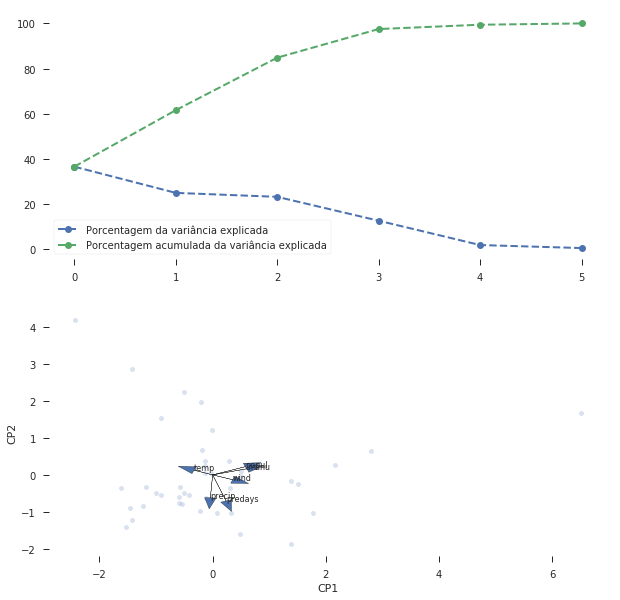

In [113]:
# scree plot e correlações CPs x variáveis
def get_angle(v1, v2):
    # calcula ângulo entre dois vetores
    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

def annotate_embedding(loadings, pc_x, pc_y, ax, scaling=10, n_features=10, angle_thr=20):
    # função para adicionar loadings no gráfico
    loadings['VectorLength'] = np.sqrt(loadings[pc_x]**2 + loadings[pc_y]**2)
    loadings = loadings.sort_values(by='VectorLength', ascending=False)
    
    # plota cada um dos maiores vetores 
    for feature, row in loadings.iloc[0:n_features].iterrows():
        vector = np.array([row[pc_x]*scaling, row[pc_y]*scaling])
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
        ax.annotate(feature, xy=(0, 0), xytext=(vector[0], vector[1]), fontsize=8)
    
    # retorna lista ordenada
    top_features = loadings.index.tolist()
    return top_features

# cria um dataframe com os resultados da ACP
pca_df = pd.DataFrame(
    resultado_pca,
    index=X.index,
    columns=['CP' + str(i + 1) for i in range(resultado_pca.shape[1])]
)

import itertools
# cria dois gráficos
_, axes = plt.subplots(nrows=2, figsize=(10,10))  # número de colunas e tamanho

# plota a variância explicada
axes[0].plot(
    pca.explained_variance_ratio_*100, "--o", linewidth=2,
    label='Porcentagem da variância explicada'
)

# plota a variância explicada acumulada
axes[0].plot(
    (pca.explained_variance_ratio_ * 100).cumsum(), "--o", linewidth=2,
    label='Porcentagem acumulada da variância explicada'
)

# mostra legenda
axes[0].legend(loc='best', frameon=True)
    
# loadings de cada componente
loadings = pd.DataFrame(
    pca.components_,
    index=['CP'+str(i+1) for i in range(len(pca.components_))],
    columns=X.columns
).T

# plota os componentes
i = 1
x, y = 'CP'+str(i), 'CP'+str(i+1)
# plotar
settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 0.2, 'x': x, 'y': y}
pca_df.plot(label=None, **settings)
# mostrar os loadings (correlações)
annotate_embedding(loadings, x, y, axes[i], scaling=1, n_features=20, angle_thr=20)
    
# faz aparecer o gráfico
plt.show();

## Selecionar componentes principais

In [120]:
# teste dos coeficientes dos autovetores
for ei in pca.components_:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ei))
print('ok!')

ok!


In [121]:
# lista com autovalores e autovetores
eig_pairs = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.components_))]

# ordenar em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

# visualizar autovalores
print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

Autovalores em ordem decrescente:
2.2510667086
1.53744201544
1.42951534611
0.779232560881
0.117434919198
0.0353084497742


In [122]:
# variãncia explicada acumulada
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  36.60271071,   61.60176787,   84.84591984,   97.51636798,
         99.42587887,  100.        ])

In [123]:
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
cp

['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6']

In [124]:
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
df

,cp,var_exp,cum_var_exp
0,CP1,36.602711,36.602711
1,CP2,24.999057,61.601768
2,CP3,23.244152,84.845920
3,CP4,12.670448,97.516368
4,CP5,1.909511,99.425879
5,CP6,0.574121,100.000000


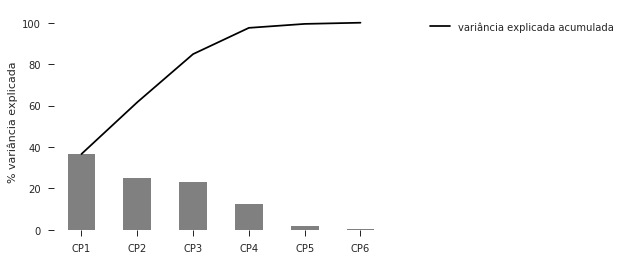

In [126]:
# scree plot
fig, ax = plt.subplots()
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='upper right', 
           bbox_to_anchor=(1.7, 1))
plt.ylabel('% variância explicada')
plt.xlabel('');

Os dois primeiros CPs explicam 61% da variação total. Ficaremos com os dois então.

### US Arrests

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

Dataframe with 50 observations on 4 variables.

- Murder (numeric)	 Murder arrests (per 100,000) homicídio
- Assault (numeric)	 Assault arrests (per 100,000) assalto
- UrbanPop (numeric)	 Percent urban population   
- Rape (numeric)	 Rape arrests (per 100,000)   estupro

In [145]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [146]:
# salvar em y os nomes dos índices
X = df
y = df.index

## ACP usando a matriz de correlações

In [147]:
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [148]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [149]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

Interpretação:




$Y_1$: 

$Y_2$:

In [132]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.53085875,  1.00996444,  0.36383998,  0.17696948])

In [133]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  62.01,   86.75,   95.66,  100.  ])

In [134]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229
Georgia,1.639283,1.278942


In [135]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  62.01,   86.75,   95.66,  100.  ])

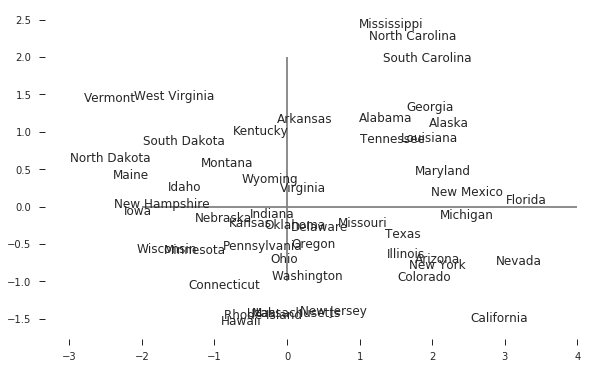

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -2, 4, color='gray')
plt.vlines(0, -1, 2, color='gray');

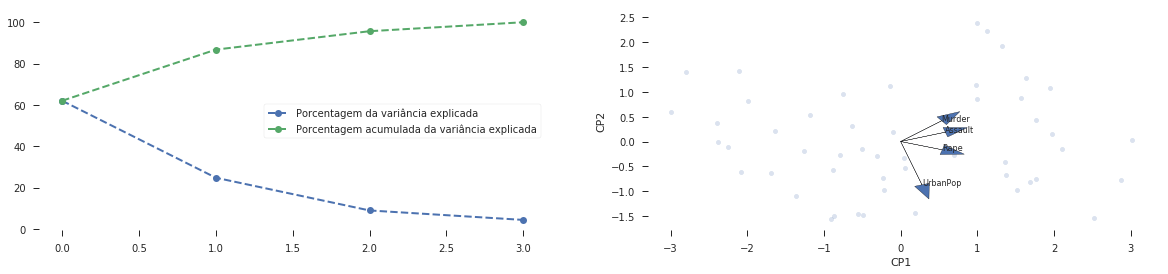

In [137]:
def get_angle(v1, v2):
    # calcula ângulo entre dois vetores
    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

def annotate_embedding(loadings, pc_x, pc_y, ax, scaling=10, n_features=10, angle_thr=20):
    # função para adicionar loadings no gráfico
    loadings['VectorLength'] = np.sqrt(loadings[pc_x]**2 + loadings[pc_y]**2)
    loadings = loadings.sort_values(by='VectorLength', ascending=False)
    
    # plota cada um dos maiores vetores 
    for feature, row in loadings.iloc[0:n_features].iterrows():
        vector = np.array([row[pc_x]*scaling, row[pc_y]*scaling])
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
        ax.annotate(feature, xy=(0, 0), xytext=(vector[0], vector[1]), fontsize=8)
    
    # retorna lista ordenada
    top_features = loadings.index.tolist()
    return top_features

# cria um dataframe com os resultados da ACP
pca_df = pd.DataFrame(
    resultado_pca,
    index=X.index,
    columns=['CP' + str(i + 1) for i in range(resultado_pca.shape[1])]
)

import itertools
# cria dois gráficos
_, axes = plt.subplots(ncols=2, figsize=(20, 4))  # número de colunas e tamanho

# plota a variância explicada
axes[0].plot(
    pca.explained_variance_ratio_*100, "--o", linewidth=2,
    label='Porcentagem da variância explicada'
)

# plota a variância explicada acumulada
axes[0].plot(
    (pca.explained_variance_ratio_ * 100).cumsum(), "--o", linewidth=2,
    label='Porcentagem acumulada da variância explicada'
)

# mostra legenda
axes[0].legend(loc='best', frameon=True)
    
# loadings de cada componente (loadings representam as correlações entre as variáveis e os componentes)
loadings = pd.DataFrame(
    pca.components_,
    index=['CP'+str(i+1) for i in range(len(pca.components_))],
    columns=X.columns
).T

# plota os componentes
i = 1
x, y = 'CP'+str(i), 'CP'+str(i+1)
# plotar
settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 0.2, 'x': x, 'y': y}
pca_df.plot(label=None, **settings)
# mostrar os loadings
annotate_embedding(loadings, x, y, axes[i], scaling=1, n_features=20, angle_thr=20)
    
# faz aparecer o gráfico
plt.show();

## Selecionar componentes principais

In [138]:
for ei in pca.components_:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ei))
print('ok!')

ok!


In [139]:
# lista com autovalores e autovetores
eig_pairs = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.explained_variance_))]

# ordenar em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

# visualizar autovalores
print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

Autovalores em ordem decrescente:
2.53085875423
1.00996444137
0.363839980185
0.176969477275


In [140]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  62.00603948,   86.75016829,   95.66424781,  100.        ])

In [141]:
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
cp

['CP1', 'CP2', 'CP3', 'CP4']

In [142]:
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
df

,cp,var_exp,cum_var_exp
0,CP1,62.006039,62.006039
1,CP2,24.744129,86.750168
2,CP3,8.914080,95.664248
3,CP4,4.335752,100.000000


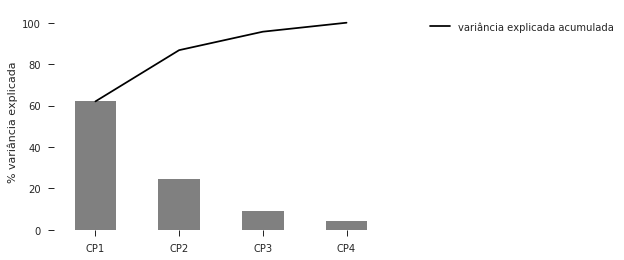

In [143]:
fig, ax = plt.subplots()
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='upper right', 
           bbox_to_anchor=(1.7, 1))
plt.ylabel('% variância explicada')
plt.xlabel('');

Os dois primeiros CPs explicam 87% da variação total. Ficaremos com os dois então.